# Лабораторная работа №1

## Моделирование измерения скорости пули

#### *Выполнил студент группы ПИН-44 Гусаров Андрей*

### Модель 1. Стрельба из огнестрельного оружия строго в горизонтальном направлении с измерением дальности полета пули.

#### Постановка задачи

Происходит выстрел в горизонтальном направлении. Требуется найти дальность полета пули.

Предположим, что:
<ol>
<li>Оружия расположенно параллельно земле и тряска рук исключена</li>
<li>Отсутствует сила сопротивления воздуха</li>
<li>Выстрел происходит в безветренную погоду</li>
<li>Пуля имеет форму шара</li>
</ol>

Дано: <br>
$ V_{нач.} = 800 \pm 5 \ м/c $ <br>
$ g = 9,80665 \ м/c^{2} $ (Стандартное («нормальное») значение, принятое при построении систем единиц)<br>
$ h = 1,4 \pm 0,2 \ м $ <br>
$ m = 0,0035 \pm 0,0005 \ кг $  (Патрон 5,45х39 мм)<br>
Найти: <br>
$L$ - дальность полета пули

<img src="model1.png" alt="drawing" width="800"/>

#### Аналитическое исследование

$ {V}_{x} -горизонтальная\ скорость$

$ {V}_{y} - вертикальная\ скорость$

$ {g} - ускорение\ свободного\ падения$

$ {F}_{тяж.} = mg $

$ {V}_{x} = V_{нач.} $

$ {V}_{y} = \frac{-{F}_{тяж.}}{m}t $

Так как пуля упадет на землю, то конечное положение по вертикале будет равно нулю:

$ y = 0 $

Составим уравнения координат для пули:

$\begin{equation*}
 \begin{cases}
 x = {V}_{x}t\\
 y = {h} + {V}_{y}t
  \end{cases}
\end{equation*}$

Подставим формулы и выразим дальность полета пули:

$\begin{equation*}
 \begin{cases}
   x = {V}_{x}t\\
   0 = {h} - \frac{gt^{2}}{2}
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
   L = {V}_{x}t\\
   t = \sqrt\frac{2h}{g}
 \end{cases}
\end{equation*}$

$ L = V_{нач.}\sqrt\frac{2h}{g} $

Исходя из полученной формулы, массой пули можно пренебречь.

#### Численное решение

Функция для вычисления численного значения дальности поле пули:

In [1]:
import math

def get_distance(v,h, g):
    l = v* math.sqrt((2*h)/g)
    return l

Численное решение без учета погрешностей с исходными данными:

In [2]:
v = 800
h = 1.4
g = 9.80665

print(get_distance(v, h, g))

427.4729761817053


Функция расчета погрешности:

In [3]:
import sympy
import math

def get_delta_L(v, dv, h, dh):
    def get_delta_v(dv, h, g):
        v =  sympy.Symbol('v')
        delta_v = sympy.diff(v* sympy.sqrt((2*h)/g), v) * dv
        return delta_v

    def get_delta_h(dh, v, g, numeric_h):
        h = sympy.Symbol('h')
        delta_h = (sympy.diff(v* sympy.sqrt((2*h)/g), h) * dh).subs(h, numeric_h)
        return delta_h
    
    delta_v = get_delta_v(dv, h, g)
    delta_h = get_delta_h(dh, v, g, h)
    delta_l = delta_v + delta_h
    return delta_l

Расчет погрешности:

In [4]:
v = 800
h = 1.4
g = 9.80665

dv = 5
dh = 0.2

print('Погрешность дальности полета пули:', get_delta_L(v, dv, h, dh))

Погрешность дальности полета пули: 33.2054901141146


Функция построения графика зависимости дальности полета пули от начальной скорости:

In [5]:
import matplotlib.pyplot as plt

def graph_dependence_flight_range_on_speed(h, g):
    v = []
    l = []

    for i in range(500,1001):
        v.append(i)

    for item in v:
        l.append(get_distance(item,h, g))

    plt.plot(v, l, 'r')
    plt.title("Зависимость дальности полета пули от начальной скорости")
    plt.xlabel("Начальная скорость, $ м/c $")
    plt.ylabel("Дальность полета пули, м")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('model1_graph_l_v.png')

Построения графика зависимости дальности полета пули от начальной скорости:

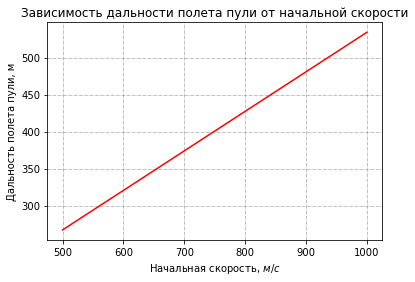

In [6]:
h = 1.4
g = 9.80665

graph_dependence_flight_range_on_speed(h, g)

Функция расчета скорости:

In [7]:
def get_speed_model1(l, h, g):
    v = l / math.sqrt((2*h)/g)
    return v

Функция построения гистограммы частотности значений скорости:

In [8]:
import random
import matplotlib.pyplot as plt

def hist_frequency_speed_values_model1(v, dv, h, dh, g):
    res = []
    
    l = get_distance(v, h, g)
    delta_L = get_delta_L(v, dv, h, dh)
    
    for i in range(10000):
        res.append(get_speed_model1(random.normalvariate(l, int(3 * delta_L )), h, g))

    plt.hist(res, 100, facecolor='r') 
    plt.title("Частотность значений скорости")
    plt.xlabel("Скорость, $ м/c $")
    plt.ylabel("Количество значений")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('model1_hist_v.png')

Построения гистограммы частотности значений скорости:

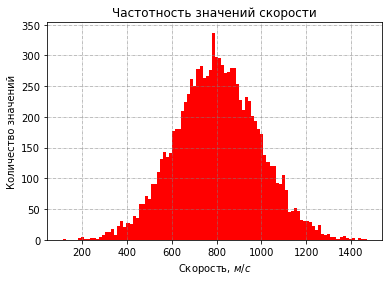

In [9]:
v = 800
h = 1.4
g = 9.80665

dv = 5
dh = 0.2

hist_frequency_speed_values_model1(v, dv, h, dh, g)

#### Основные источники ошибок

<ol>
<li>Погрешность входных данных</li>
<li>Учитана малая часть физических явлений</li>
</ol>

#### Численный результат
$ L =(427,473 \pm 33,205) \ м $

### Модель 2. Стрельба в ящик с песком на жестком подвесе с измерением угла отклонения.

#### Постановка задачи

Происходит выстрел в ящик с песком, висящий на жестком подвесе. Пуля застревает в ящике. Найти максимальный угол отклонения ящика.

Предположим, что:
<ol>
    <li>Оружия расположенно параллельно земле и тряска рук исключена</li>
    <li>Трос нерастяжимый</li>
    <li>Отсутствует сила сопротивления воздуха</li>
    <li>Выстрел происходит в безветренную погоду</li>
    <li>Отсутствуют любые силы трения</li>
    <li>Пуля имеет форму шара</li>
    <li>Вся кинетическая энергия пули переходит в потенциальную энергию мешка и пули</li>
</ol>

Дано: <br>
$ V_{нач.} = 800 \pm 5 \ м/c$ <br>
$ g = 9,80665 \ м/c^{2} $ (Стандартное («нормальное») значение, принятое при построении систем единиц)<br>
$ l = 0,5 \pm 0,1 \ м $ <br>
$ M = 0,9 \pm 0,005 \ кг $ <br>
$ m = 0,0035 \pm 0,0005 \ кг $  (Патрон 5,45х39 мм)<br>
Найти: <br>
$\alpha$ - дальность полета пули

<img src="model2.png" alt="drawing" width="800"/>

#### Аналитическое исследование

$V_{нач.} - начальная\ скорость\ пули$

$V_{столк.} - скорость\ ящика\ с\ пулей\ в\ момент\ столкновения$

$ {g} - ускорение\ свободного\ падения$

$h - высота\ подъема\ ящика$

Формула расчета высоты подъема ящика:

$h = l(1-\cos(\alpha)) $

Кинетическая энергия ящика с пулей в момент столкновения:

$E_{к}=\frac{(m+M)V_{нач}^{2}}{2}$

Потенциальная энергия ящика с пулей в момент столкновения:

$E_{п}=(m+M)gh$

По Закону сохранения энергии:

$E_{к} = E_{п}$

$\frac{(m+M)V_{столк}^{2}}{2} = (m+M)gh$

$\frac{V_{столк}^{2}}{2} = gh$

По Закону сохранения импульса:

$mV_{нач.}=(m+M)V_{столк.}$

$V_{столк.} = \frac{mV_{нач.}}{(m+M)}$

$\frac{({\frac{mV_{нач.}}{(m+M)})}^{2}}{2}=gh$

$\frac{({\frac{mV_{нач.}}{(m+M)})}^{2}}{2}=gl(1-\cos(\alpha))$

$ 1-\cos(\alpha) = \frac{(\frac{({\frac{mV_{нач.}}{(m+M)})}^{2}}{2})}{gl}$

$ \cos(\alpha) = 1 - \frac{(\frac{({\frac{mV_{нач.}}{(m+M)})}^{2}}{2})}{gl}$

$ \cos(\alpha) = 1 - \frac{({\frac{mV_{нач.}}{m+M})}^{2}}{2gl}$

$ \alpha = \arccos{(1 - \frac{({\frac{mV_{нач.}}{m+M})}^{2}}{2gl})}$

#### Численное решение

Функция для вычисления численного решения угла отклонения ящика с пулей:

In [10]:
import math

def get_angle_deviation(m, M, v, g, l):
   return math.acos((1-(((m*v)/(m+M))**2)/(2*g*l)))/math.pi*180

Численное решение без учета погрешностей с исходными данными:

In [11]:
m = 0.0035
M = 0.9
l = 1
g = 9.80665
v = 800

print(get_angle_deviation(m, M, v, g, l))

59.314605808861394


Функция расчета скорости:

$ V_{нач} = \frac{\sqrt{2gl(1-\cos(\alpha))}(m+M)}{m}$

In [12]:
import math

def get_speed_model2(alpha, m, M, g, l):
    v = (math.sqrt(2*g*l*(1-math.cos(alpha*math.pi/180)))*(m+M))/m
    return v

In [13]:
print(get_speed_model2(59.314605808861394, m, M, g, l))

799.9999999999999


Функция расчета погрешности:

In [14]:
import sympy
import math

def get_delta_alpha(v, dv, m, dm, M, dM, g, l, dl):  
    
    def get_delta_v(dv, m, M, g, l, numeric_v):
        v = sympy.Symbol('v')
        delta_v = (sympy.diff(sympy.acos((1-(((m*v)/(m+M))**2)/(2*g*l)))/math.pi*180, v)*dv).subs(v, numeric_v)
        return delta_v

    def get_delta_m(dm, v, M, g, l, numeric_m):
        m = sympy.Symbol('m')
        delta_m = (sympy.diff(sympy.acos((1-(((m*v)/(m+M))**2)/(2*g*l)))/math.pi*180, m)*dm).subs(m, numeric_m)
        return delta_m

    def get_delta_M(dM, m, v, g, l, numeric_M):
        M = sympy.Symbol('M')
        delta_M = (sympy.diff(sympy.acos((1-(((m*v)/(m+M))**2)/(2*g*l)))/math.pi*180, M)*dM).subs(M, numeric_M)
        return delta_M

    def get_delta_l(dl, m, M, v, g, numeric_l):
        l = sympy.Symbol('l')
        delta_l = (sympy.diff(sympy.acos((1-(((m*v)/(m+M))**2)/(2*g*l)))/math.pi*180, l)*dl).subs(l, numeric_l)
        return delta_l
    
    delta_v = get_delta_v(dv, m, M, g, l, v)
    delta_m = get_delta_m(dm, v, M, g, l, m)
    delta_M = get_delta_M(dM, m, v, g, l, M)
    delta_l = get_delta_l(dl, m, M, v, g, l)
    return delta_v + delta_m + delta_M + delta_l

Расчет погрешности:

In [15]:
m = 0.0035
M = 0.9
l = 1
g = 9.80665
v = 800

dm = 0.0005
dM = 0.005
dl = 0.1
dv = 5

get_delta_alpha(v, dv, m, dm, M, dM, g, l, dl)

6.06941879792596

Функция построение графика зависимости угла отклонения ящика с пулей от начальной скорости пули:

In [16]:
import matplotlib.pyplot as plt

def graph_dependence_angle_deviation_on_speed(m, M, g, l):
    v = []
    alpha = []

    for i in range(500,1501):
        v.append(i)

    for item in v:
        alpha.append(get_angle_deviation(m, M, item, g, l))

    plt.plot(v, alpha, 'r')
    plt.title("Зависимость угла отклонения ящика с пулей от начальной скорости пули")
    plt.xlabel("Начальная скорость, $ м/c $")
    plt.ylabel("Угол отклонения, $^{\circ}$")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('model2_graph_a_v.png')

Построение графика зависимости угла отклонения ящика с пулей от начальной скорости пули:

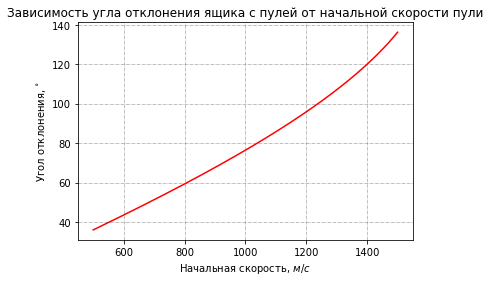

In [17]:
m = 0.0035
M = 0.9
l = 1
g = 9.80665
v = 800

graph_dependence_angle_deviation_on_speed(m, M, g, l)

Функция построения гистограммы частотности значений начальной скорости:

In [18]:
import random
import matplotlib.pyplot as plt

def hist_frequency_speed_values_model2(v, dv, m, dm, M, dM, g, l, dl):
    res = []
    
    aplha = get_angle_deviation(m, M, v, g, l)
    delta_alpha = get_delta_alpha(v, dv, m, dm, M, dM, g, l, dl)
    
    for i in range(10000):
        res.append(get_speed_model2(random.normalvariate(aplha, int(3 * delta_alpha)), m, M, g, l))

    plt.hist(res, 100, facecolor='r') 
    plt.title("Частотность значений скорости")
    plt.xlabel("Скорость, $ м/c $")
    plt.ylabel("Количество значений")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('model2_hist_v.png')

Построения гистограммы частотности значений начальной скорости:

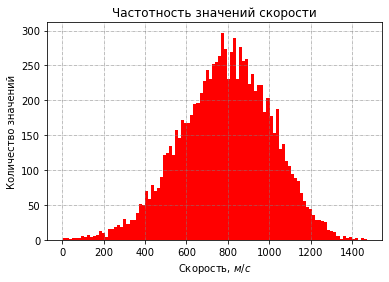

In [19]:
m = 0.0035
M = 0.9
l = 1
g = 9.80665
v = 800

dm = 0.0005
dM = 0.005
dl = 0.1
dv = 5

hist_frequency_speed_values_model2(v, dv, m, dm, M, dM, g, l, dl)

#### Основные источники ошибок

<ol>
<li>Погрешность входных данных</li>
<li>Учитана малая часть физических явлений</li>
</ol>

#### Численный результат
$ \alpha = (59,314 \pm 7,701)^{\circ} $